# DropEdge vs Dropout on Subgraph FL with Non-overlapping Nodes

## Cora Dataset

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from visualizer import *
#######################################################
current_dir = os.path.join('../../logs/', 'Cora_disjoint/dropout_compar')
print('current_dir:', current_dir)
def create_info(name, logs, viz):
    return {'name': name, 'viz': viz,
        'logs': [os.path.join(current_dir, path) for path in logs]}
#######################################################
%matplotlib inline

current_dir: ../../logs/Cora_disjoint/dropout_compar


### 5 Clients

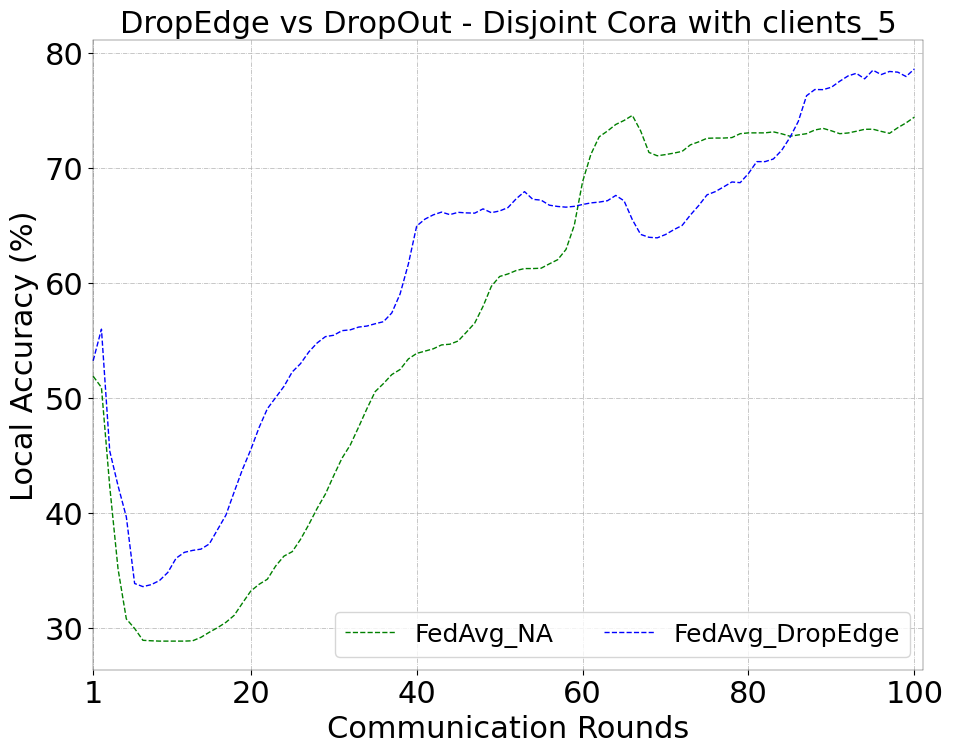

,model,Rnd @ Acc 80,Acc @ Rnd 100,Acc @ Best Val,Std @ Best Val,Acc @ Best Val All,Std @ Best Val All,Processed Rnds
0,FedAvg_NA,N/A,74.42,74.42,2.99,76.59,1.59,100
1,FedAvg_DropEdge,N/A,78.61,78.23,2.44,78.86,1.82,100


In [2]:
clients = 'clients_5'
upto = 100
target_acc = 80
interval_rnd = 20
models = [
    create_info(
        name='FedAvg_NA', 
        logs=[
            f'{clients}/20230814_021152_fedavg_NA',
            f'{clients}/20230814_032939_fedavg_NA',
            f'{clients}/20230814_045047_fedavg_NA',
        ],
        viz={'color':'green', 'linewidth': 1, 'linestyle': '--', 'marker': 'o', 'markevery':interval_rnd, 'markersize':0}),
    create_info(
        name='FedAvg_DropEdge', 
        logs=[
            f'{clients}/20230814_005408_fedavg_DropEdge',
            f'{clients}/20230813_221756_fedavg_DropEdge',
            f'{clients}/20230813_233355_fedavg_DropEdge',
        ],
        viz={'color':'blue', 'linewidth': 1, 'linestyle': '--', 'marker': 'P', 'markevery':interval_rnd, 'markersize':0}),
]

plot_acc_over_round(models=models, upto=upto, opt={
    'plt_font_size': 22,
    'plt_line_width': 0.25,
    'plt_fig_size': (10,8),
    'plt_title': f'DropEdge vs DropOut - Disjoint Cora with {clients}',
    'plt_y_label': 'Local Accuracy (%)',
    'plt_x_label': 'Communication Rounds',
    'plt_x_interval': interval_rnd,
    'plt_background_grid': True,
    'plt_legend_opt': {'ncol':2, 'fontsize': 18, 'loc': 'lower right'},
    'plt_save': f'../plots/cora_{clients}.png'
})

summary(
    models = models,
    upto = upto,
    target_acc = target_acc,
    target_rnd = upto
)


### 10 Clients

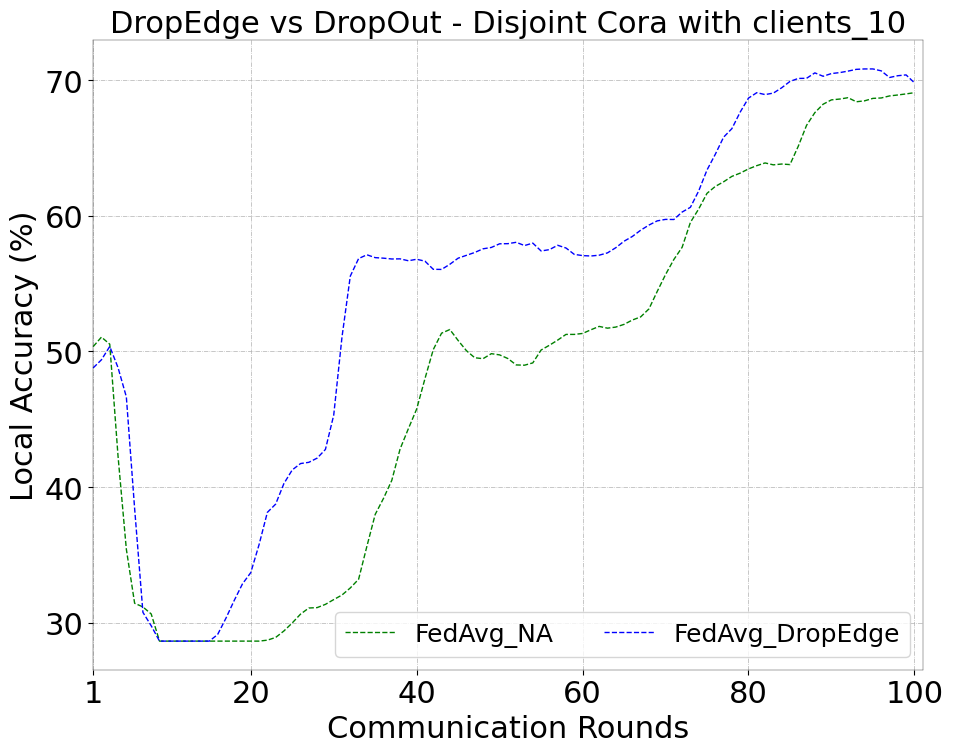

,model,Rnd @ Acc 80,Acc @ Rnd 100,Acc @ Best Val,Std @ Best Val,Acc @ Best Val All,Std @ Best Val All,Processed Rnds
0,FedAvg_NA,N/A,69.07,69.07,0.67,69.08,0.67,100
1,FedAvg_DropEdge,N/A,69.80,70.82,2.14,70.72,2.19,100


In [3]:
clients = 'clients_10'
upto = 100
target_acc = 80
interval_rnd = 20
models = [
    create_info(
        name='FedAvg_NA', 
        logs=[
            f'{clients}/20230814_023001_fedavg_NA',
            f'{clients}/20230814_035356_fedavg_NA',
            f'{clients}/20230814_051828_fedavg_NA'
        ],
        viz={'color':'green', 'linewidth': 1, 'linestyle': '--', 'marker': 'o', 'markevery':interval_rnd, 'markersize':0}),
    create_info(
        name='FedAvg_DropEdge', 
        logs=[
            f'{clients}/20230813_222332_fedavg_DropEdge',
            f'{clients}/20230813_234723_fedavg_DropEdge',
            f'{clients}/20230814_011058_fedavg_DropEdge',
        ],
        viz={'color':'blue', 'linewidth': 1, 'linestyle': '--', 'marker': 'P', 'markevery':interval_rnd, 'markersize':0}),
]

plot_acc_over_round(models=models, upto=upto, opt={
    'plt_font_size': 22,
    'plt_line_width': 0.25,
    'plt_fig_size': (10,8),
    'plt_title': f'DropEdge vs DropOut - Disjoint Cora with {clients}',
    'plt_y_label': 'Local Accuracy (%)',
    'plt_x_label': 'Communication Rounds',
    'plt_x_interval': interval_rnd,
    'plt_background_grid': True,
    'plt_legend_opt': {'ncol':2, 'fontsize': 18, 'loc': 'lower right'},
    'plt_save': f'../plots/cora_{clients}.png'
})

summary(
    models = models,
    upto = upto,
    target_acc = target_acc,
    target_rnd = upto
)
